In [1]:
from plotting import plot_scores, plot_comparisons
from comparisons import read_df, compare_dfs, best_dfs, perturbations

In [2]:
model_cfg = 'default_gcn'

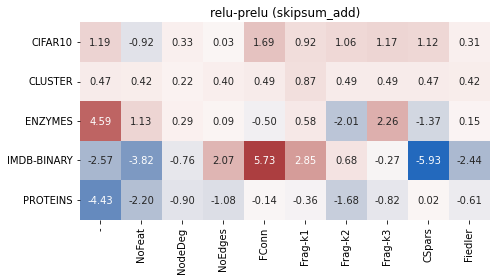

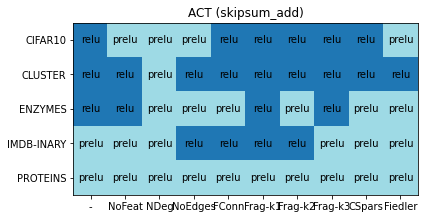

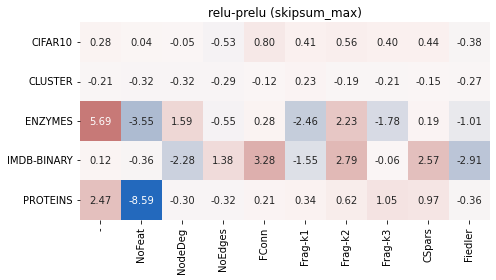

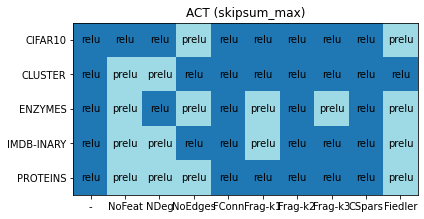

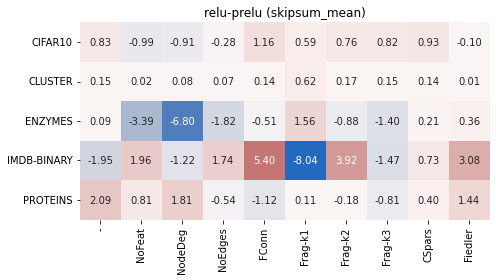

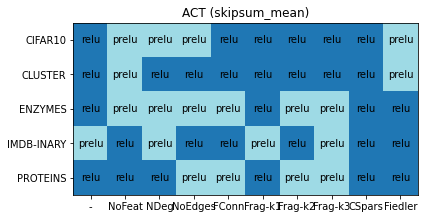

In [3]:
# Best ACT type for each dataset-perturbation combination

comp_type = 'ACT'
comps = ['skipsum_add', 'skipsum_max', 'skipsum_mean']
for c in comps:
    res_file_1 = fr'../agg_results/sweeps/{model_cfg}/relu_{c}.json'
    res_file_2 = fr'../agg_results/sweeps/{model_cfg}/prelu_{c}.json'

    score_diff = compare_dfs(res_file_1, res_file_2)

    df_temp = read_df(res_file_1)
    datasets = sorted(df_temp['Dataset'].unique())
    comp_name = fr'comparisons/{model_cfg}/{comp_type}'

    plot_scores(score_diff, datasets, perturbations, figsize=(7, 4), title=fr'relu-prelu ({c})', save_dir=comp_name, center=0.)

    rf_dict = {'relu': res_file_1, 'prelu': res_file_2}
    df_best = best_dfs(rf_dict)
    plot_comparisons(df_best, list(rf_dict.keys()), title=fr'{comp_type} ({c})', save_dir=comp_name)


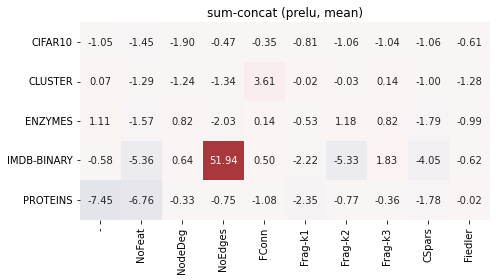

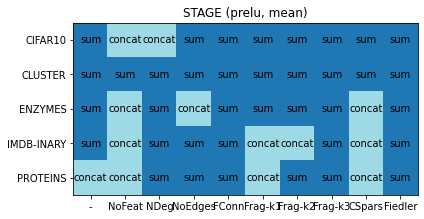

In [4]:
# Comparing the differences between stage types: CONCAT vs SUM

comp_type = 'STAGE'
res_file_1 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipsum_mean.json'
res_file_2 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipconcat_mean.json'

score_diff = compare_dfs(res_file_1, res_file_2)

df_temp = read_df(res_file_1)
datasets = sorted(df_temp['Dataset'].unique())
comp_name = fr'comparisons/{model_cfg}/{comp_type}'

plot_scores(score_diff, datasets, perturbations, figsize=(7, 4), title='sum-concat (prelu, mean)', save_dir=comp_name, center=0.)


rf_dict = {'sum': res_file_1, 'concat': res_file_2}
df_best = best_dfs(rf_dict)
plot_comparisons(df_best, list(rf_dict.keys()), title=fr'{comp_type} (prelu, mean)', save_dir=comp_name)



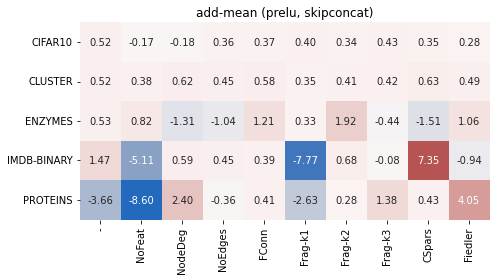

In [5]:
# Comparing the differences between two sets of hyps

comp_type = 'AGG'
res_file_1 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipconcat_add.json'
res_file_2 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipconcat_mean.json'

score_diff = compare_dfs(res_file_1, res_file_2)

df_temp = read_df(res_file_1)
datasets = sorted(df_temp['Dataset'].unique())
comp_name = fr'comparisons/{model_cfg}/{comp_type}'

plot_scores(score_diff, datasets, perturbations, figsize=(7, 4), title='add-mean (prelu, skipconcat)', save_dir=comp_name, center=0.)

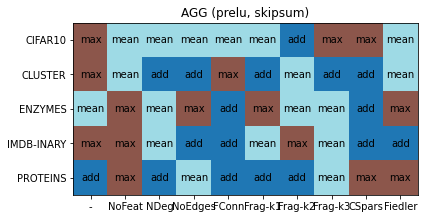

In [6]:
# Best AGG type for each dataset-perturbation combination

comp_type = 'AGG'
res_file_1 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipsum_add.json'
res_file_2 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipsum_max.json'
res_file_3 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipsum_mean.json'

rf_dict = {'add': res_file_1, 'max': res_file_2, 'mean': res_file_3}
df_best = best_dfs(rf_dict)

plot_comparisons(df_best, list(rf_dict.keys()), fr'{comp_type} (prelu, skipsum)', fr'comparisons/{model_cfg}/{comp_type}')



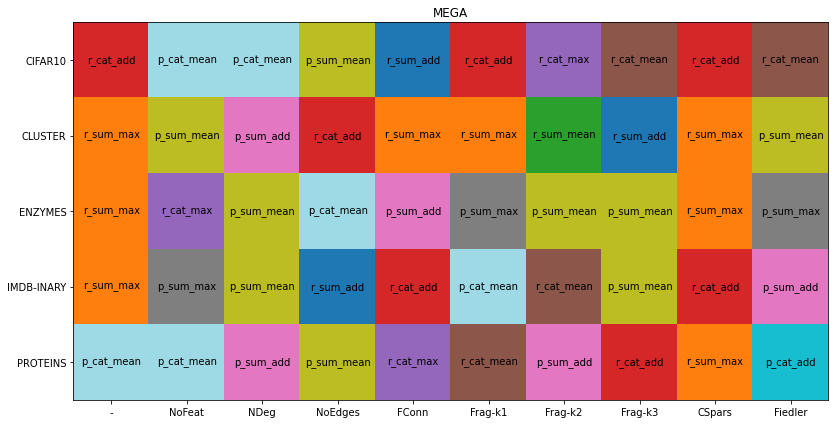

In [7]:
# ONE COMPARISON TO BEAT THEM ALL

comp_type = 'ALL'
res_file_1 = fr'../agg_results/sweeps/{model_cfg}/relu_skipsum_add.json'
res_file_2 = fr'../agg_results/sweeps/{model_cfg}/relu_skipsum_max.json'
res_file_3 = fr'../agg_results/sweeps/{model_cfg}/relu_skipsum_mean.json'
res_file_4 = fr'../agg_results/sweeps/{model_cfg}/relu_skipconcat_add.json'
res_file_5 = fr'../agg_results/sweeps/{model_cfg}/relu_skipconcat_max.json'
res_file_6 = fr'../agg_results/sweeps/{model_cfg}/relu_skipconcat_mean.json'
res_file_7 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipsum_add.json'
res_file_8 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipsum_max.json'
res_file_9 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipsum_mean.json'
res_file_10 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipconcat_add.json'
res_file_11 = fr'../agg_results/sweeps/{model_cfg}/prelu_skipconcat_mean.json'

rf_dict = {
    'r_sum_add': res_file_1,
    'r_sum_max': res_file_2,
    'r_sum_mean': res_file_3,
    'r_cat_add': res_file_4,
    'r_cat_max': res_file_5,
    'r_cat_mean': res_file_6,
    'p_sum_add': res_file_7,
    'p_sum_max': res_file_8,
    'p_sum_mean': res_file_9,
    'p_cat_add': res_file_10,
    'p_cat_mean': res_file_11
}
df_best = best_dfs(rf_dict)

plot_comparisons(df_best, list(rf_dict.keys()), fr'MEGA', fr'comparisons/{model_cfg}', figsize=(14, 6))